In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv('loan_data.csv',parse_dates=True)

In [139]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [140]:
df.shape

(9578, 14)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [142]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Text(0.5, 0, 'FICO')

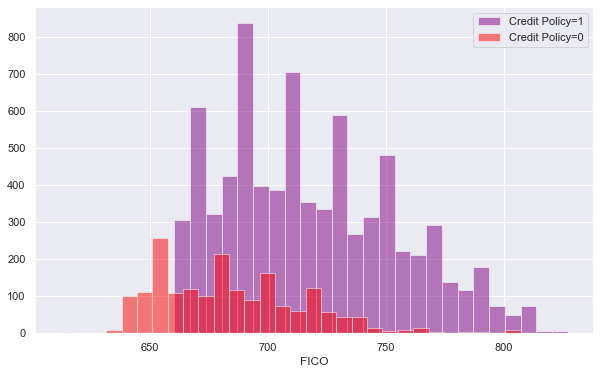

In [143]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='purple',bins=30,label='Credit Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

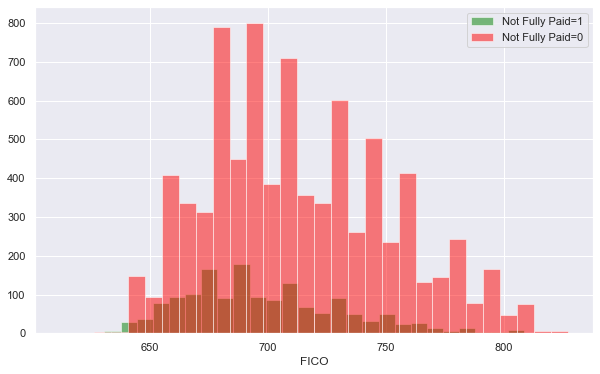

In [144]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='Not Fully Paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

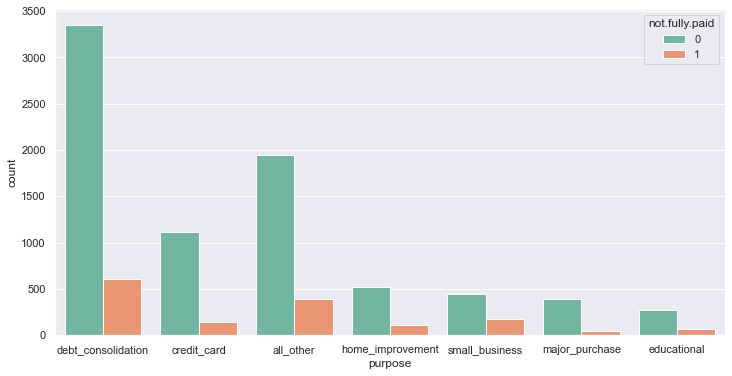

In [145]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid',palette="Set2", data = df)

AttributeError: 'JointGrid' object has no attribute 'annotate'

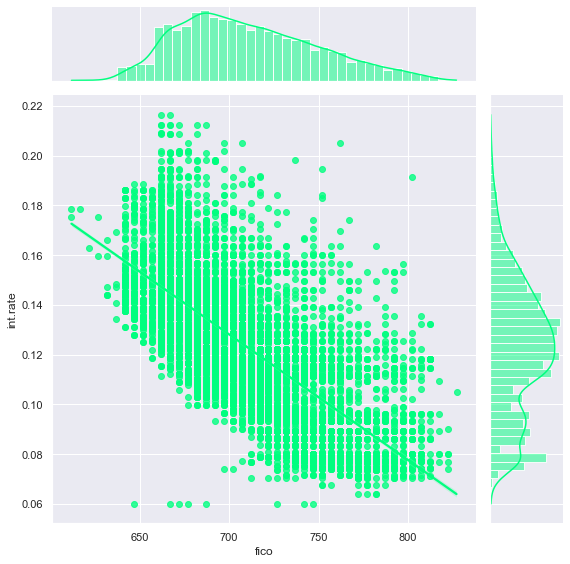

In [146]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('fico', 'int.rate', data = df, kind='reg', height=8,color='springgreen')
j.annotate(stats.pearsonr)
plt.show()

In [148]:
new_col = ['purpose']

In [149]:
purpose_df = pd.get_dummies(df, columns = new_col, drop_first = True)
purpose_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [150]:
purpose_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [151]:
X = purpose_df.drop('not.fully.paid', axis = 1)
y = purpose_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

In [152]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Decision Tree Classification

In [153]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [154]:
DTC_y_pred = classifier.predict(X_test)#Accuracy
from sklearn.metrics import accuracy_score #works
print("Accuracy:",accuracy_score(y_test, DTC_y_pred))

Accuracy: 0.7244258872651357


In [155]:
DTC_y_predict = classifier.predict(X_test)

In [156]:
from sklearn.metrics import confusion_matrix, classification_report

In [157]:
print(classification_report(y_test, DTC_y_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.72      2874
   macro avg       0.51      0.52      0.51      2874
weighted avg       0.75      0.72      0.74      2874



In [158]:
print(confusion_matrix(y_test, DTC_y_predict))

[[1986  445]
 [ 347   96]]


# Random Forest Classification

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
r_Forest = RandomForestClassifier(n_estimators = 300)

In [161]:
r_Forest.fit(X_train,y_train) 
RFC_y_predic=r_Forest.predict(X_test)

In [162]:
from sklearn import metrics

In [163]:
print("Accuracy:",metrics.accuracy_score(y_test, RFC_y_predic))

Accuracy: 0.8465553235908142


In [164]:
print(classification_report(y_test, RFC_y_predic))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [165]:
print(confusion_matrix(y_test,RFC_y_predic))

[[2424    7]
 [ 434    9]]


# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [168]:
logistic_r_pre = logisticRegr.predict(X_test)

In [169]:
score = logisticRegr.score(X_test, y_test)
print("Accuracy:",score)

Accuracy: 0.8462073764787752


In [170]:
print(classification_report(y_test, logistic_r_pre))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.52      0.04      0.07       443

    accuracy                           0.85      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.80      0.85      0.79      2874



In [171]:
print(confusion_matrix(y_test,logistic_r_pre))

[[2416   15]
 [ 427   16]]


In [ ]:
Support Vector Class

In [172]:
from sklearn.svm import SVC

In [173]:
svc_model = SVC(gamma='auto')

In [174]:
svc_model = svc_model.fit(X_train,y_train)

In [175]:
svc_y_pred = svc_model.predict(X_test)#Accuracy
from sklearn.metrics import accuracy_score #works
print("Accuracy:",accuracy_score(y_test, svc_y_pred))

Accuracy: 0.8462073764787752


In [176]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.70      0.50      0.47      2874
weighted avg       0.80      0.85      0.78      2874



In [177]:
print(confusion_matrix(y_test,svc_y_pred))

[[2427    4]
 [ 438    5]]


In [180]:
print("Decision Tree Accuracy:",accuracy_score(y_test, DTC_y_pred))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, RFC_y_predic))
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, logistic_r_pre))
print("Support Vector Accuracy:",accuracy_score(y_test, svc_y_pred))

Decision Tree Accuracy: 0.7244258872651357
Random Forest Accuracy: 0.8465553235908142
Logistic Regression Accuracy: 0.8462073764787752
Support Vector Accuracy: 0.8462073764787752
